#GATHERING THE DATA

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("../data/advertising.csv")
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

#EXPLORATORY DATA ANALYSIS

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [48]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [49]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [50]:
df.duplicated().sum()

0

#SUMMARY STATISTICS & FEATURE ENGINEERING

In [51]:
correlation_matrix = df.corr()
print(correlation_matrix['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [52]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

columns_to_check = ['TV', 'Radio', 'Newspaper', 'Sales']
outlier_counts = {}

for column in columns_to_check:
    outliers = detect_outliers(df, column)
    outlier_counts[column] = len(outliers)

print(outlier_counts)

{'TV': 0, 'Radio': 0, 'Newspaper': 2, 'Sales': 0}


#VIZUALIZATION PHASE

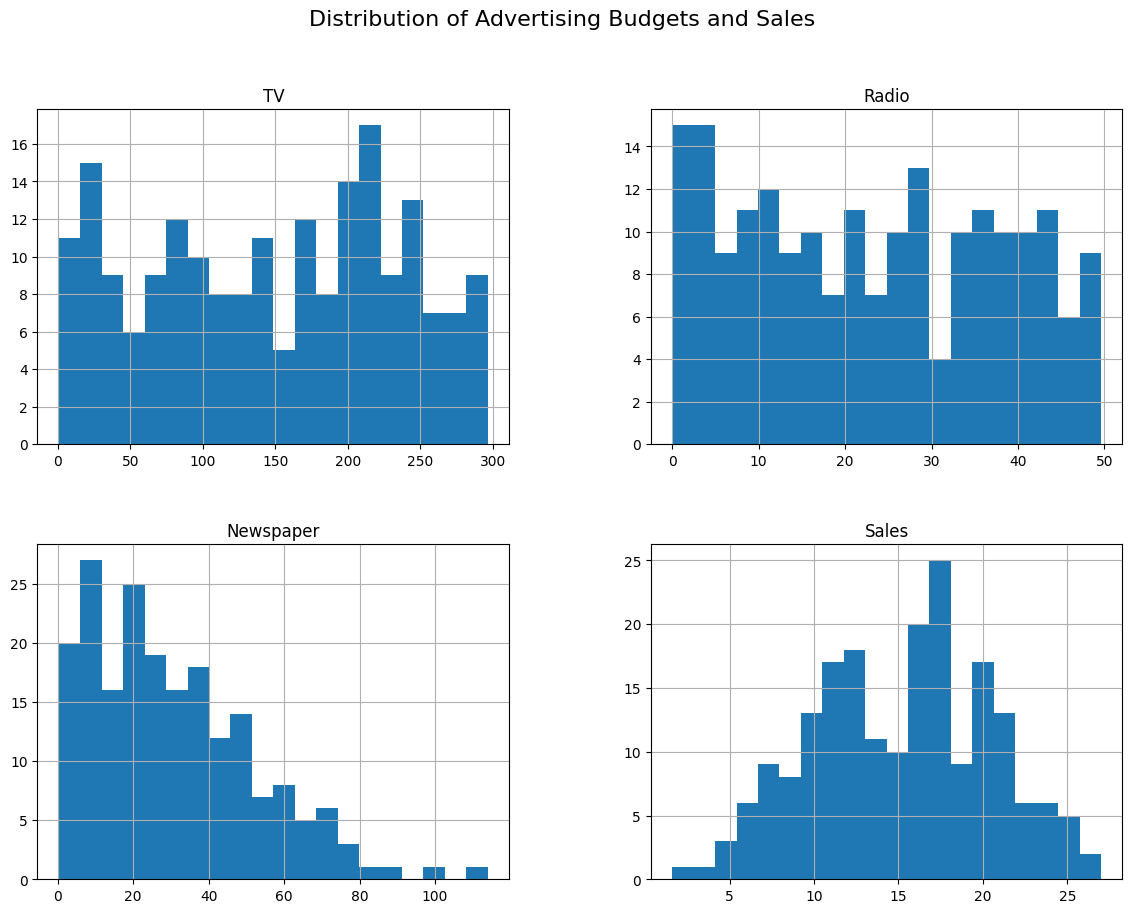

In [53]:
df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Advertising Budgets and Sales', fontsize=16)
plt.show()

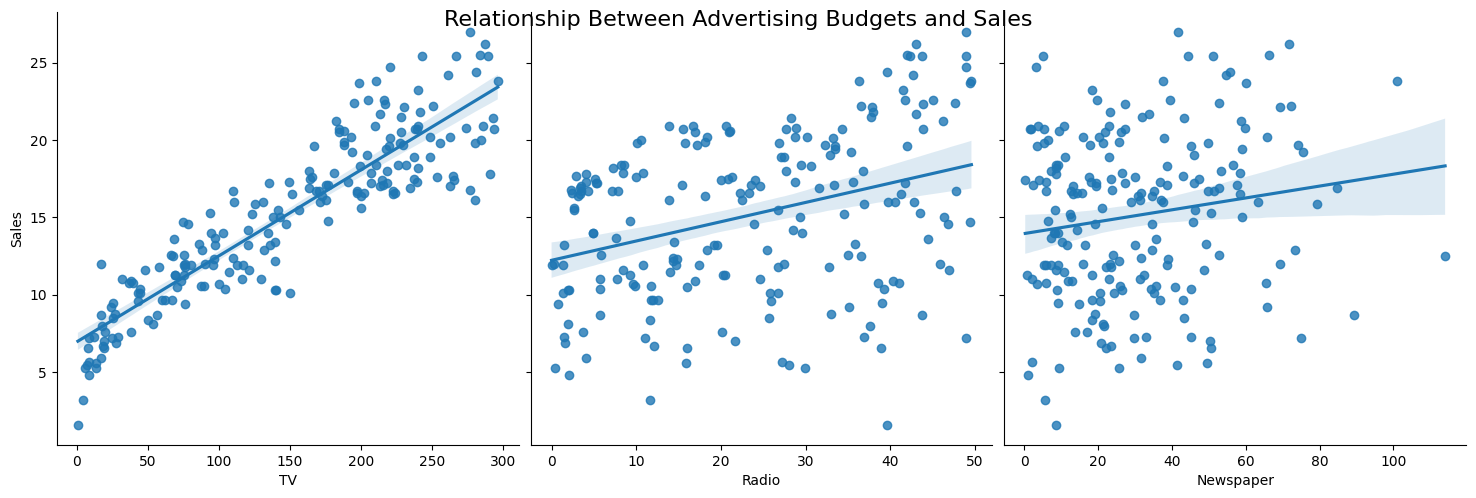

In [54]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', height=5, aspect=1)
plt.suptitle('Relationship Between Advertising Budgets and Sales', fontsize=16)
plt.show()

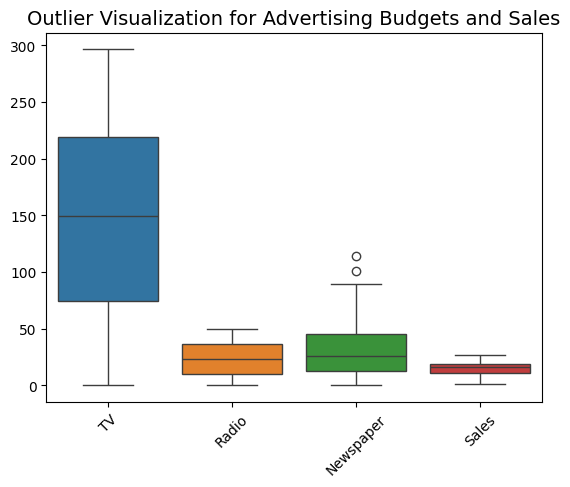

In [55]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Outlier Visualization for Advertising Budgets and Sales', fontsize=14)
plt.show()

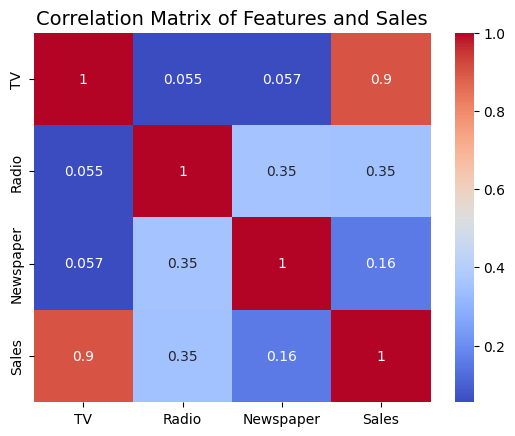

In [56]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Sales', fontsize=14)
plt.show()

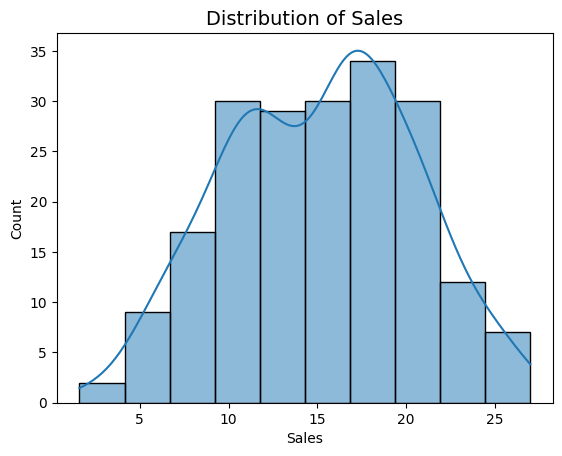

In [57]:
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales', fontsize=14)
plt.show()

#MODEL TRAINING AND BUILDING

In [58]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##LINEAR REGRESSION(MULTIVARIATE)

###TRAINING

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###TESTING

In [61]:
y_pred = model.predict(X_test)

print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

R-squared: 0.9059011844150826
RMSE: 1.7052146229349223
MAE: 1.2748262109549338


##RIDGE REGRESSION

In [62]:
from sklearn.linear_model import Ridge

ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

ridge_scores = cross_val_score(ridge_pipe, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Ridge Regression CV RMSE: {-np.mean(ridge_scores)}")

Ridge Regression CV RMSE: 1.665554589034464


###TRAINING

In [63]:
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(random_state=42))])

###TESTING

In [64]:
y_pred = ridge_pipe.predict(X_test)
print(f"Ridge Regression Test RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

Ridge Regression Test RMSE: 1.7074302367919387


##LASSO Regression

In [65]:
from sklearn.linear_model import Lasso

lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])

lasso_scores = cross_val_score(lasso_pipe, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Lasso Regression CV RMSE: {-np.mean(lasso_scores)}")

Lasso Regression CV RMSE: 2.1565025858724267


###TRAINING

In [66]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

###TESTING

In [67]:
y_pred = lasso_pipe.predict(X_test)
print(f"Lasso Regression Test RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

Lasso Regression Test RMSE: 2.343866119206355


##DECISION TREE REGRESSOR

In [68]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=42)
dtree_scores = cross_val_score(dtree, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Decision Tree Regressor CV RMSE: {-np.mean(dtree_scores)}")

Decision Tree Regressor CV RMSE: 1.584312864860659


###TRAINING

In [69]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

###TESTING

In [70]:
y_pred = dtree.predict(X_test)
print(f"Decision Tree Regressor Test RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

Decision Tree Regressor Test RMSE: 1.8444511378727275


##RANDOM FOREST REGRESSOR

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"Random Forest Regressor CV RMSE: {-np.mean(rf_scores)}")

Random Forest Regressor CV RMSE: 1.2334427111100528


###TRAINING

In [72]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

###TESTING

In [73]:
y_pred = rf.predict(X_test)
print(f"Random Forest Regressor Test RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

Random Forest Regressor Test RMSE: 1.1989298770153327


##GRADIENT BOOSTING MACHINES(XGBOOST)

In [76]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb_scores = cross_val_score(xgb, X, y, scoring='neg_root_mean_squared_error', cv=5)
print(f"XGBoost Regressor CV RMSE: {-np.mean(xgb_scores)}")

XGBoost Regressor CV RMSE: 1.3029525195528542


###TRAINING

In [77]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

###TESTING

In [78]:
y_pred = xgb.predict(X_test)
print(f"XGBoost Regressor Test RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

XGBoost Regressor Test RMSE: 1.2047526943385323


##HYPERPARAMETER TUNING WITH RANDOM FOREST

In [79]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {-grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV RMSE: 1.2517815943696697


In [80]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test RMSE with Best Parameters: {mean_squared_error(y_test, y_pred, squared=False)}")

Test RMSE with Best Parameters: 1.207124854248806


##RANDOM FOREST MODEL VISUALIZATION

In [81]:
from sklearn.tree import plot_tree

In [82]:
rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

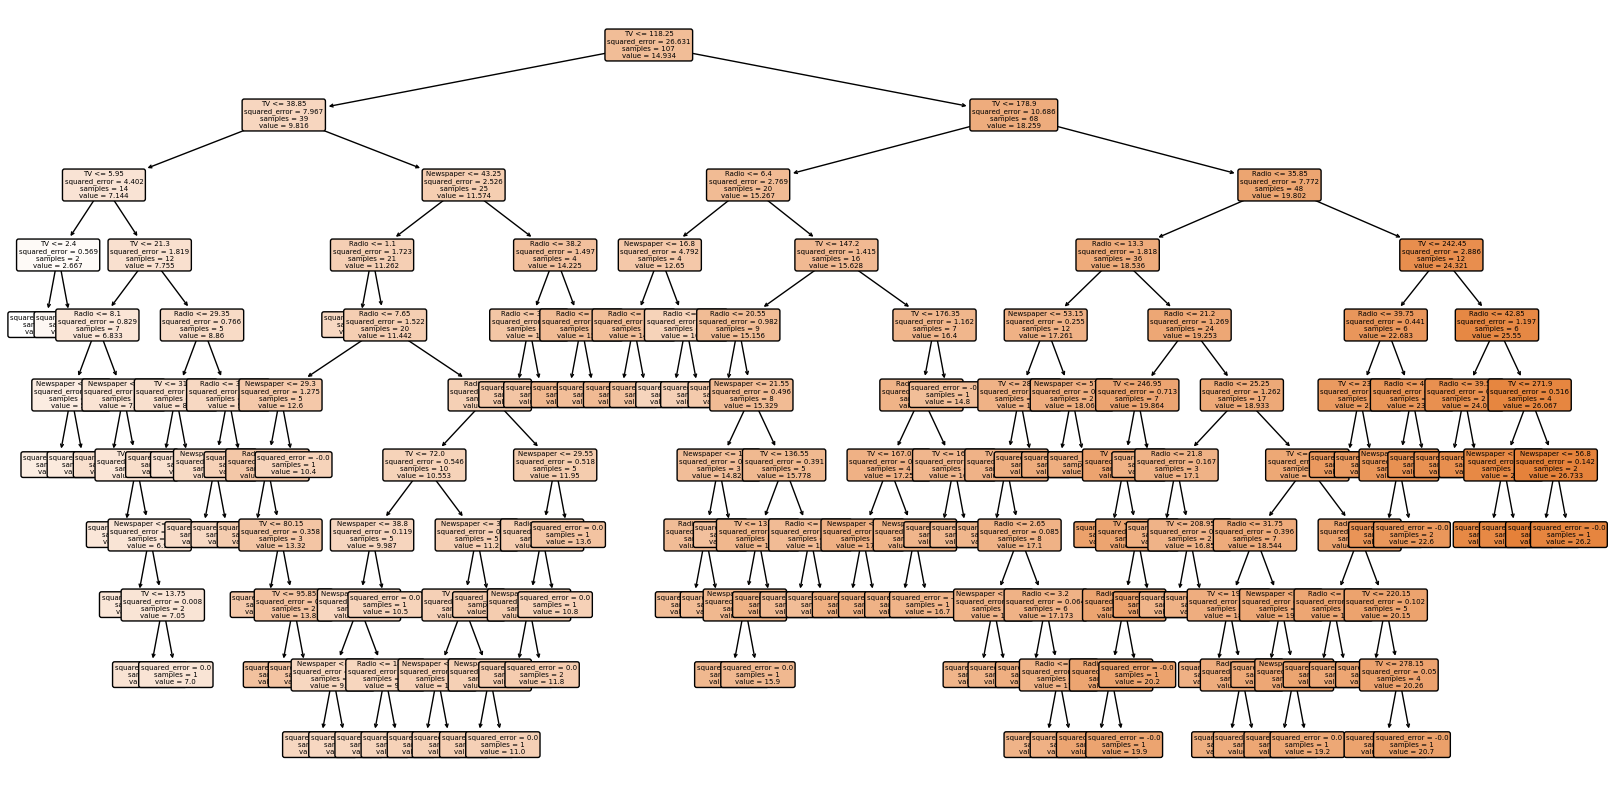

In [89]:
selected_tree = rf_model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(selected_tree, 
          feature_names=X_train.columns, 
          filled=True, 
          rounded=True, 
          fontsize=5)
plt.show()